# Simple Grid 2 Analysis

In [42]:
import glob
import pandas as pd
import json

files = glob.glob("./saved_models/**/epoch=*/", recursive=True)

def get_records(files):
    for path in files:
        attrs = {key:val for key,val in [ x.split("=") for x in path.split("/")[2:-1] ]}
        with open(path+"/logs.json", "r") as jsonfile:
            attrs.update(json.load(jsonfile))
        yield attrs

df = pd.json_normalize(get_records(files))

df["depth"] = df["depth"].astype(int)
df["width"] = df["width"].astype(int)
df["epoch"] = df["epoch"].astype(int)
df["repetition"] = df["repetition"].astype(int)

In [46]:
import seaborn as sns
from matplotlib import pyplot as plt

In [47]:
df

,experiment,depth,width,repetition,epoch,cca,sparsity.nnz_weights,sparsity.total_weights,sparsity.nnz_biases,sparsity.total_biases,basic_statistics.weight_avg,basic_statistics.bias_avg,layerwise_pca.explained_variance,linear_probes.mse,linear_probes.mae,logs.loss,logs.val_loss
0,simplegrid2,7,11,1,80,"[[1.0000000539594576, 0.5571324789054457, 0.49...","[88, 121, 121, 121, 121, 121, 121, 11]","[88, 121, 121, 121, 121, 121, 121, 11]","[11, 10, 11, 9, 9, 10, 11, 1]","[11, 11, 11, 11, 11, 11, 11, 1]","[0.03878972306847572, 0.010949566029012203, -0...","[0.025503186509013176, 0.00978178158402443, -0...","[[0.18095763027668, 0.062234703451395035, 0.01...","[0.019946895399874865, 0.018679691426185085, 0...","[0.1036844162829802, 0.09980718524051152, 0.09...",0.014203,0.013982
1,simplegrid2,7,11,1,20,"[[0.9999997664158452, 0.5353407707807698, 0.46...","[88, 121, 121, 121, 121, 121, 121, 11]","[88, 121, 121, 121, 121, 121, 121, 11]","[11, 10, 10, 9, 9, 10, 11, 1]","[11, 11, 11, 11, 11, 11, 11, 1]","[0.0414290688931942, 0.008772860281169415, -0....","[0.02384842559695244, 0.019008157774806023, 0....","[[0.12428689002990723, 0.05874519795179367, 0....","[0.019562884145126854, 0.018396711164158946, 0...","[0.10220437792170153, 0.09906746888631723, 0.0...",0.015886,0.015371
2,simplegrid2,7,11,1,60,"[[0.9999999101876462, 0.5486951903613327, 0.49...","[88, 121, 121, 121, 121, 121, 121, 11]","[88, 121, 121, 121, 121, 121, 121, 11]","[11, 10, 11, 9, 9, 10, 11, 1]","[11, 11, 11, 11, 11, 11, 11, 1]","[0.041368719190359116, 0.0116215068846941, -0....","[0.02248147502541542, 0.013359934091567993, -0...","[[0.1691363900899887, 0.06249764934182167, 0.0...","[0.019827704519930458, 0.01860256048616595, 0....","[0.10334687346308905, 0.09947586742587262, 0.0...",0.014411,0.015102
3,simplegrid2,7,11,1,40,"[[0.9999997664158452, 0.5331086871414847, 0.49...","[88, 121, 121, 121, 121, 121, 121, 11]","[88, 121, 121, 121, 121, 121, 121, 11]","[11, 10, 10, 9, 9, 10, 11, 1]","[11, 11, 11, 11, 11, 11, 11, 1]","[0.04570840299129486, 0.01008025836199522, -0....","[0.022614695131778717, 0.01674806699156761, 0....","[[0.15401645004749298, 0.06285147368907928, 0....","[0.01965545006638881, 0.018831832857245403, 0....","[0.10272995516528316, 0.10023476271474824, 0.0...",0.014746,0.014169
4,simplegrid2,7,11,1,100,"[[1.0000000539594576, 0.556014622435958, 0.492...","[88, 121, 121, 121, 121, 121, 121, 11]","[88, 121, 121, 121, 121, 121, 121, 11]","[11, 10, 11, 9, 9, 10, 11, 1]","[11, 11, 11, 11, 11, 11, 11, 1]","[0.03632934391498566, 0.009356897324323654, -0...","[0.024826018139719963, 0.006805102806538343, -...","[[0.1930243968963623, 0.062026336789131165, 0....","[0.02003470956991941, 0.018800474598774045, 0....","[0.10391721987204669, 0.0999843036390729, 0.09...",0.014073,0.014637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,simplegrid2,3,7,0,20,"[[1.0000003051245667, 0.6288794926604494, 0.62...","[56, 49, 49, 7]","[56, 49, 49, 7]","[6, 6, 6, 1]","[7, 7, 7, 1]","[0.06222466006875038, -0.02513810619711876, 0....","[0.09200368821620941, 0.03239094093441963, 0.0...","[[0.04286644607782364, 0.02744390070438385, 0....","[0.02088621972095512, 0.020712092178099436, 0....","[0.10511225852343764, 0.10658851295193994, 0.0...",0.018451,0.018843
104,simplegrid2,3,7,0,60,"[[0.9999999446695337, 0.624215134621701, 0.594...","[56, 49, 49, 7]","[56, 49, 49, 7]","[6, 6, 6, 1]","[7, 7, 7, 1]","[0.057206034660339355, -0.04183883219957352, 0...","[0.07967082411050797, 0.031473614275455475, -0...","[[0.03576996177434921, 0.023036116734147072, 0...","[0.01982701750781084, 0.019334162334390587, 0....","[0.10173400773166956, 0.10151881165305485, 0.0...",0.016934,0.017395
105,simplegrid2,3,7,0,40,"[[0.9999999446695337, 0.622362556150912, 0.607...","[56, 49, 49, 7]","[56, 49, 49, 7]","[6, 6, 6, 1]","[7, 7, 7, 1]","[0.05512970685958862, -0.034606095403432846, 0...","[0.08462859690189362, 0.02912592887878418, -0....","[[0.03711448609828949, 0.022921934723854065, 0...

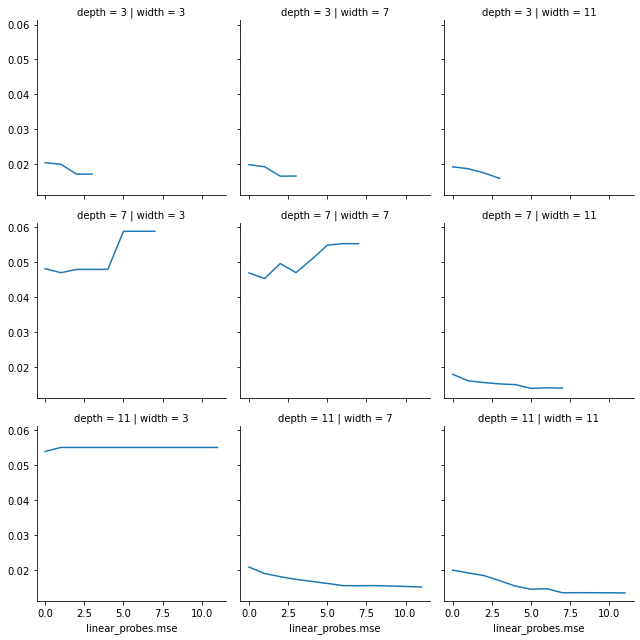

In [59]:
grid = sns.FacetGrid(df.query("repetition==0 & epoch==100"), row="depth", col="width")
grid.map(lambda mse, **kwargs : plt.plot(mse.values[0]), 'linear_probes.mse')

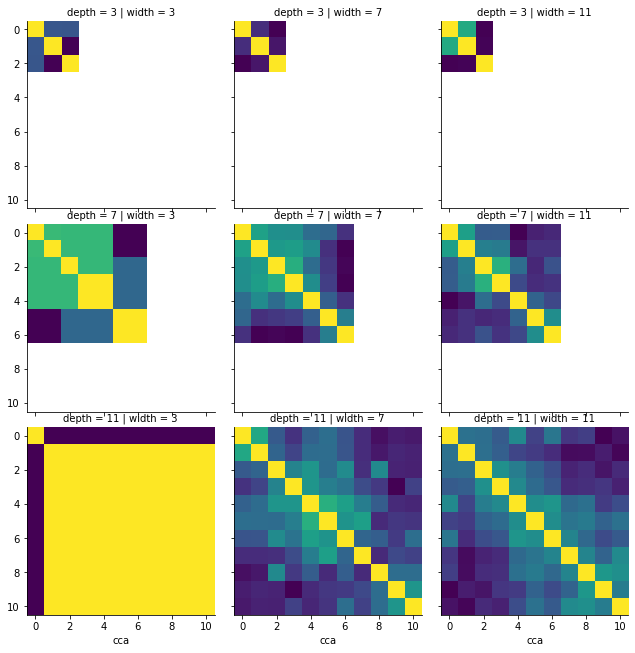

In [61]:
grid = sns.FacetGrid(df.query("repetition==0 & epoch==100"), row="depth", col="width")
grid.map(lambda mse, **kwargs : plt.imshow(mse.values[0]), 'cca')

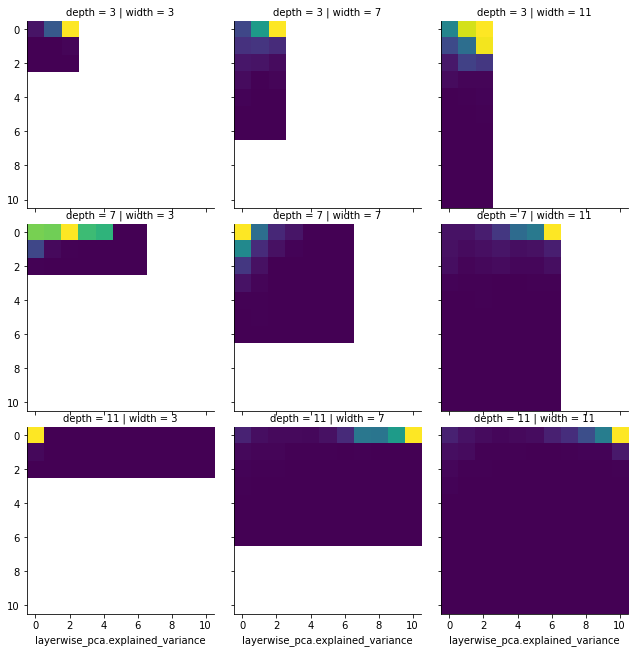

In [79]:
grid = sns.FacetGrid(df.query("repetition==0 & epoch==100"), row="depth", col="width")
grid.map(lambda var, **kwargs : plt.imshow(np.array(var.values[0][:-1]).T), 'layerwise_pca.explained_variance')